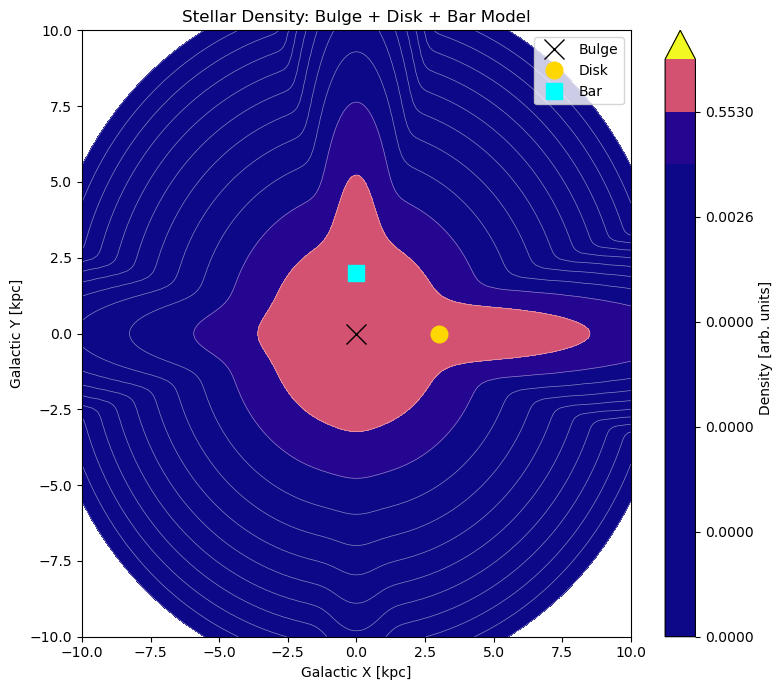

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

# EXERCISE 1: 2D Gaussian Mixture Contour Plot
def gaussian_2d(x, y, x0, y0, sigma_x, sigma_y, amp):
    return amp * np.exp(-((x - x0) ** 2 / (2 * sigma_x ** 2) +
                          (y - y0) ** 2 / (2 * sigma_y ** 2)))

x = np.linspace(-10, 10, 200)
y = np.linspace(-10, 10, 200)
X, Y = np.meshgrid(x, y)

# Mixture: bulge + disk + bar
density = (
    gaussian_2d(X, Y, 0, 0, 1.5, 1.5, 5) +   # bulge
    gaussian_2d(X, Y, 3, 0, 3, 0.5, 3) +     # disk
    gaussian_2d(X, Y, 0, 2, 0.5, 2, 2)       # bar
)

# Evita problemas con log10(0)
density_safe = np.clip(density, 1e-12, None)

fig, ax = plt.subplots(figsize=(8, 7))
levels = np.logspace(np.log10(density_safe.min()) + 0.1,
                     np.log10(density_safe.max()), 12)

cf = ax.contourf(X, Y, density_safe, levels=levels, cmap='plasma', extend='max')
ax.contour(X, Y, density_safe, levels=levels, colors='white', alpha=0.5, linewidths=0.5)

ax.set_xlabel('Galactic X [kpc]')
ax.set_ylabel('Galactic Y [kpc]')
ax.set_title('Stellar Density: Bulge + Disk + Bar Model')
plt.colorbar(cf, ax=ax, label='Density [arb. units]')

ax.plot([0], [0], 'kx', ms=15, label='Bulge')
ax.plot([3], [0], 'o', color='gold', ms=12, label='Disk')
ax.plot([0], [2], 's', color='cyan', ms=12, label='Bar')
ax.legend()

plt.tight_layout()

os.makedirs('data', exist_ok=True)
plt.savefig('data/gaussian_mixture.png', dpi=150, bbox_inches='tight')
plt.show()
